In [1]:
import cmipaccess as cmip
import numpy as np

In [4]:
ds = cmip.spiritx.get_all_detrended_global_time_series('CNRM-CM6-1','historical','tas', no_parent=True)

100%|██████████| 29/29 [00:00<00:00, 68.23it/s]


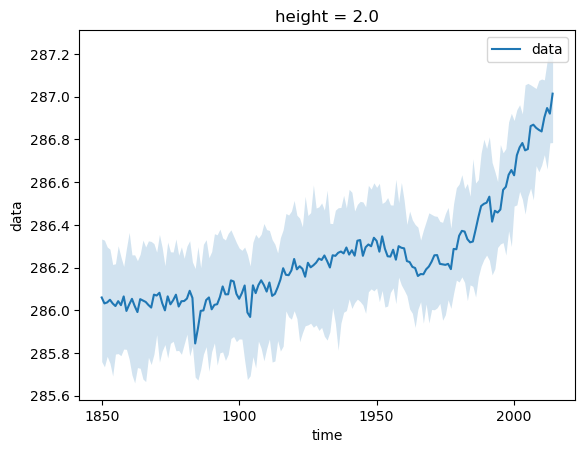

In [8]:
ds.data.resample(time='YS').mean().lntime.plot()

In [ ]:
# ds.control_extract.plot()
# ds.control_drift.plot()
ds.detrended_data.lntime.climato().plot()


In [ ]:
cmip.get_CMIP6_data('CESM2','amip-p4K', 'r1i1p1f1', 'rsdt', chunks = dict(time=10))

In [ ]:
cmip.esgf.find_models_experiment('hist-volc')

In [ ]:
cmip.get_path_CMIP6_data_esgf('CanESM5', 'piClim-histall','r1i1p2f1', 'tas')

In [ ]:
from pyesgf.search import SearchConnection
conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib=True)

In [ ]:
ctx = conn.new_context(
    project='CMIP5',
    experiment='piControl',
    model='CCSM4',
    # ensemble='r1i1p1',
    time_frequency='mon',
    facets='model',
    data_node='esgf2.dkrz.de',
    )
ctx.hit_count
result = ctx.search()[0]
variable='tos'
# result = [k for k in ctx.search() if f".{variable}." in k ]
result.dataset_id
files = result.file_context().search()
for file in files:
    if 'tasmax' in file.opendap_url:
        tasmax_url = file.opendap_url
        print(tasmax_url)

In [ ]:
files = ctx.search()[1].file_context().search()

In [ ]:
for file in files:
    print(file.opendap_url)